In [1]:
#Loading data
#Nombre: Luis Antonio Izquierdo Horna
#Código: 20104701
###########################

import pandas as pd
import numpy as np
import warnings

In [12]:
#Parte 01: Explorando/manipulando la base de datos
#Base de datos: Covid - 19 MINSA - QLAB
df_original=pd.read_csv('C:/Users/luisa/Downloads/Covid_dist_panel.csv', encoding='Latin-1')
df_original.head()

,X,ubigeo_inei,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA,CASOS,FALLECIDOS,FALLECIDOS_SINADEF,FALLECIDOS_2019,EXCESO_MUERTES
0,4,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,202003,0,0,16,10,6
1,5,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,202004,47,0,5,10,-5
2,7,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,202005,165,3,10,9,1
3,9,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,202006,119,2,15,7,8
4,11,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,202007,175,2,6,16,-10


In [3]:
#Explorando la base de datos
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33193 entries, 0 to 33192
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   X                   33193 non-null  int64 
 1   ubigeo_inei         33193 non-null  int64 
 2   DEPARTAMENTO        33193 non-null  object
 3   PROVINCIA           33193 non-null  object
 4   DISTRITO            33193 non-null  object
 5   FECHA               33193 non-null  int64 
 6   CASOS               33193 non-null  int64 
 7   FALLECIDOS          33193 non-null  int64 
 8   FALLECIDOS_SINADEF  33193 non-null  int64 
 9   FALLECIDOS_2019     33193 non-null  int64 
 10  EXCESO_MUERTES      33193 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 2.8+ MB


In [5]:
df_original.shape #Más de 30 mil obsersvaciones y 11 variables

(33193, 11)

In [20]:
df=df_original.drop(columns=['FECHA', 'X', 'FALLECIDOS', 'EXCESO_MUERTES', 'ubigeo_inei']) #Gestionando una nueva BD

In [21]:
df.describe()


,CASOS,FALLECIDOS_SINADEF,FALLECIDOS_2019
count,33193.000000,33193.000000,33193.000000
mean,62.032386,11.926641,5.372127
std,322.143715,50.060255,16.099870
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,3.000000,2.000000,1.000000
75%,16.000000,6.000000,3.000000
max,11218.000000,1473.000000,249.000000


In [26]:
#Gestionando la información
df.columns= df.columns.str.lower()
df.sort_values("casos",ascending = False, inplace = True)

In [27]:
df.head()# El distrito de Bellavista registró más casos para el periodo de análisis. Aproximadamente 11000 casos

,departamento,provincia,distrito,casos,fallecidos_sinadef,fallecidos_2019
11945,CALLAO,PROV. CONST. DEL CALLAO,BELLAVISTA,11218,161,46
23097,LIMA,LIMA,SAN JUAN DE LURIGANCHO,9514,1414,194
22508,LIMA,LIMA,LIMA,9446,841,201
23096,LIMA,LIMA,SAN JUAN DE LURIGANCHO,9373,1473,187
11944,CALLAO,PROV. CONST. DEL CALLAO,BELLAVISTA,8941,151,44


In [29]:
nuevos_nombres = {'fallecidos_sinadef': 'f_sinadef', 'fallecidos_2019' : 'f_2019'}
df.rename(columns = nuevos_nombres, inplace = True)
df.head()

,departamento,provincia,distrito,casos,f_sinadef,f_2019
11945,CALLAO,PROV. CONST. DEL CALLAO,BELLAVISTA,11218,161,46
23097,LIMA,LIMA,SAN JUAN DE LURIGANCHO,9514,1414,194
22508,LIMA,LIMA,LIMA,9446,841,201
23096,LIMA,LIMA,SAN JUAN DE LURIGANCHO,9373,1473,187
11944,CALLAO,PROV. CONST. DEL CALLAO,BELLAVISTA,8941,151,44


In [60]:
#Generando una nueva variable que muestre la diferencia en valor absoluto de sinadef y el minsa (2019)
def diferencia (f_sinadef, f_minsa):
    '''
    La función arroja una diferencia en valor absoluto
    Imput:
    muertos_diferencia        f_sinadef:numero
            f_minsa:numero    
    Output:
            dif: numero
               
    '''
    dif=abs(f_sinadef - f_minsa)
       
    return dif

df['muertos_diferencia']= diferencia(df['f_sinadef'] , df['f_2019'])

In [61]:
df.head()

,departamento,provincia,distrito,casos,f_sinadef,f_2019,muertos_diferencia
11945,CALLAO,PROV. CONST. DEL CALLAO,BELLAVISTA,11218,161,46,115
23097,LIMA,LIMA,SAN JUAN DE LURIGANCHO,9514,1414,194,1220
22508,LIMA,LIMA,LIMA,9446,841,201,640
23096,LIMA,LIMA,SAN JUAN DE LURIGANCHO,9373,1473,187,1286
11944,CALLAO,PROV. CONST. DEL CALLAO,BELLAVISTA,8941,151,44,107


In [64]:
#Agregando algunos datos - Analizando el número de casos por departamento en Peru
df[['casos', 'departamento']].groupby('departamento').sum()


,casos
departamento,
AMAZONAS,31061
ANCASH,75649
APURIMAC,25780
AREQUIPA,114015
AYACUCHO,33062
CAJAMARCA,64330
CALLAO,95799
CUSCO,72867
HUANCAVELICA,15782


In [65]:
#Agregando algunos datos - Analizando el número de fallecidos 2019 por departamento en Peru

df[['f_2019', 'departamento']].groupby('departamento').sum()


,f_2019
departamento,
AMAZONAS,1396
ANCASH,8903
APURIMAC,2621
AREQUIPA,11033
AYACUCHO,3425
CAJAMARCA,5259
CALLAO,6654
CUSCO,9967
HUANCAVELICA,2932


In [70]:
new_agg = df.groupby(['departamento']).agg({'muertos_diferencia': ['sum'],'f_2019': ['sum']})
new_agg
#La cifra señala lo que se comentaba en su momento, que las cifras del minsa subestimaban la realidad y que en realidad 
#era la mitad o tercera parte de la cantidad total de fallecidos

,muertos_diferencia,f_2019
,sum,sum
departamento,,
AMAZONAS,1466,1396
ANCASH,9904,8903
APURIMAC,3156,2621
AREQUIPA,11748,11033
AYACUCHO,3844,3425
CAJAMARCA,7276,5259
CALLAO,9703,6654
CUSCO,7850,9967


In [93]:
#Parte 2: Graficando
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


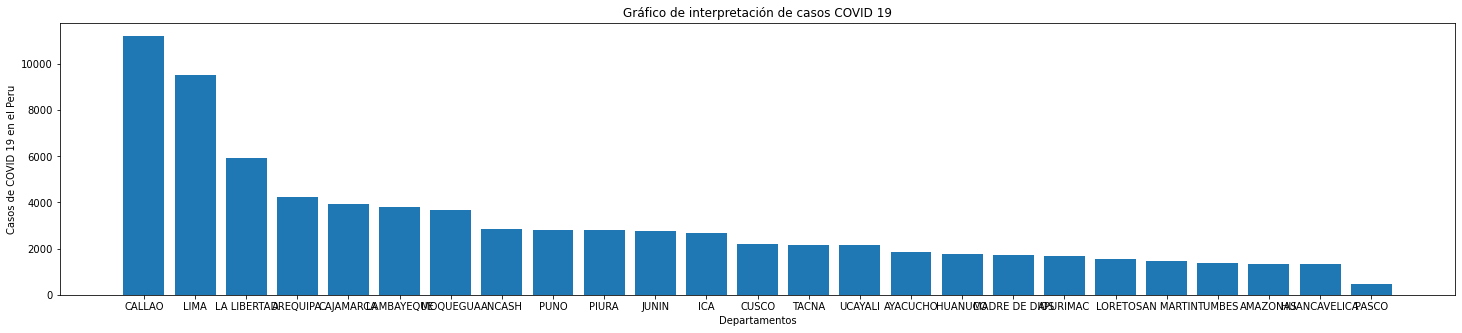

In [101]:
fig, ax = plt.subplots(figsize=(25,5))
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Casos de COVID 19 en el Peru')
ax.set_xlabel('Departamentos')
#Colocamos una etiqueta en el eje X
ax.set_title('Gráfico de interpretación de casos COVID 19')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.bar(df['departamento'],df['casos'], align='center')
#Finalmente mostramos la grafica con el metodo show()
plt.show()
#Apreciamos que el gráfico si bien nos genera una idea de lo que queremos mostrar, no es del todo estético, por lo que
#intentaremos lo siguiente:

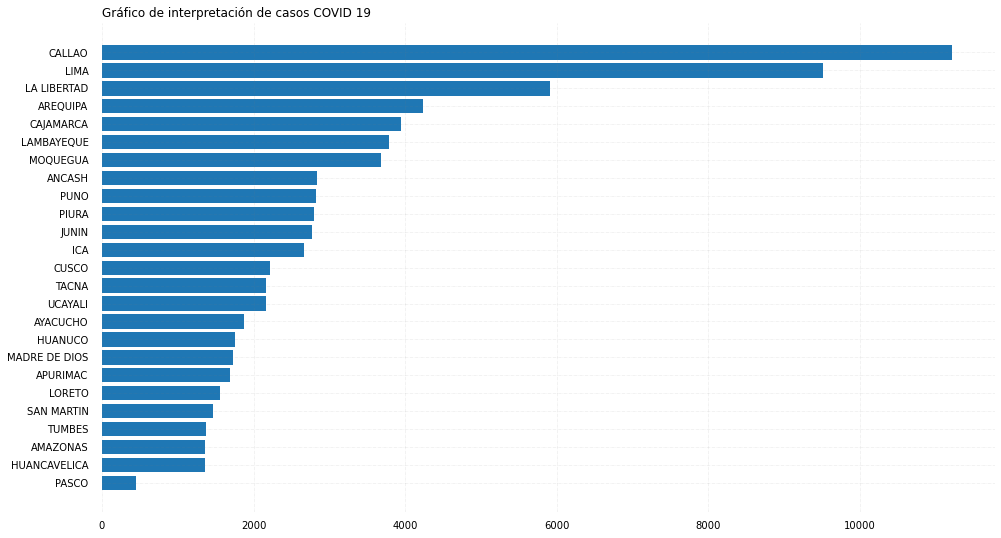

In [104]:
depa = df['departamento']
cas = df['casos']
 
fig, ax = plt.subplots(figsize =(16, 9))
 
ax.barh(depa, cas)
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
ax.set_title('Gráfico de interpretación de casos COVID 19', loc ='left', )
plt.show()

In [ ]:
#Con esto culmina el proyecto final
#Luis Izquierdo
